In [1]:
%store -r __impR

In [2]:
__impR

In [3]:
%store -r __SNKFR

In [4]:
__SNKFR

In [5]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

In [6]:
def concat_df(x,y):
    return pd.concat([x,y]).reset_index(drop=True)

def split_df(x):
    return x[0:1458],x[1458:].drop('SalePrice',axis=1)

In [7]:
df_train = train.copy()
df_test = test.copy()
df_all = concat_df(df_train,df_test)

df_train.name = 'TRAIN DATA'
df_test.name = 'TEST DATA'
df_all.name = 'ALL DATA'

dfs = [df_train,df_test]

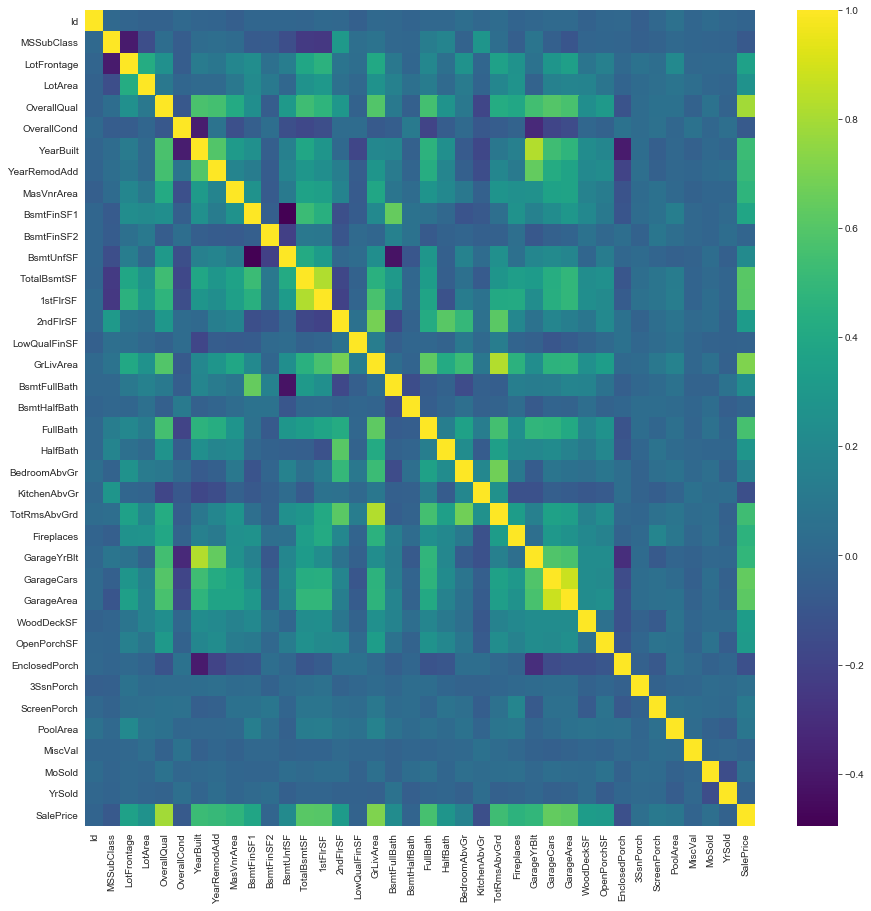

In [8]:
plt.figure(figsize = (15,15))
sns.heatmap(df_train.corr(),cmap='viridis')

In [9]:
top_features = df_train.corr()['SalePrice'].sort_values(ascending=False)[:10].index

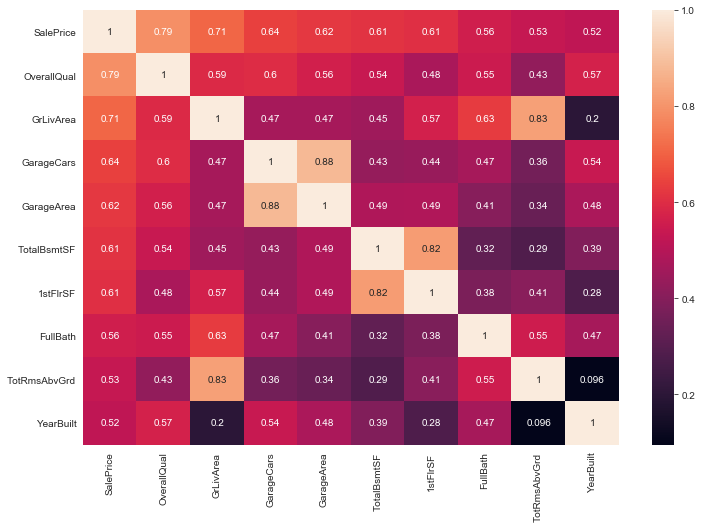

In [10]:
sns.heatmap(df_train.corr()[top_features].loc[top_features],annot=True)

In [11]:
(df_train.isna().sum()/df_train.isna().count()).sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
dtype: float64

In [12]:
# col = ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt','SalePrice']

# sns.pairplot(df_train[col])

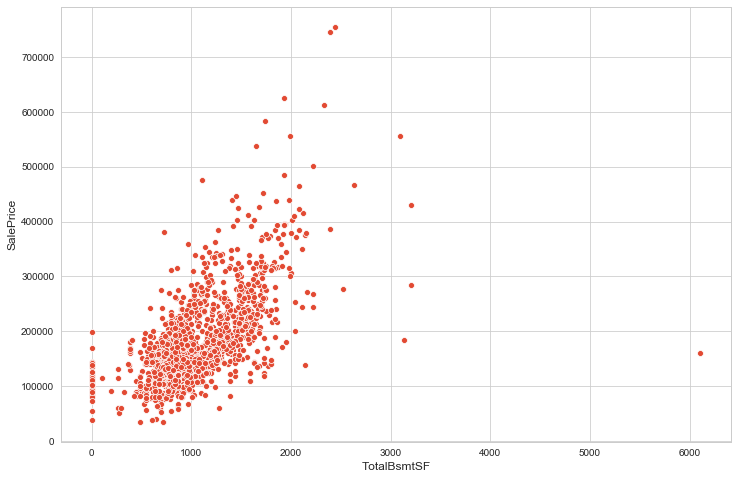

In [13]:
sns.scatterplot(df_train['TotalBsmtSF'],df_train['SalePrice'])

In [14]:
df_train = df_train.drop(df_train[df_train['TotalBsmtSF']>5000].index)

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1200 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

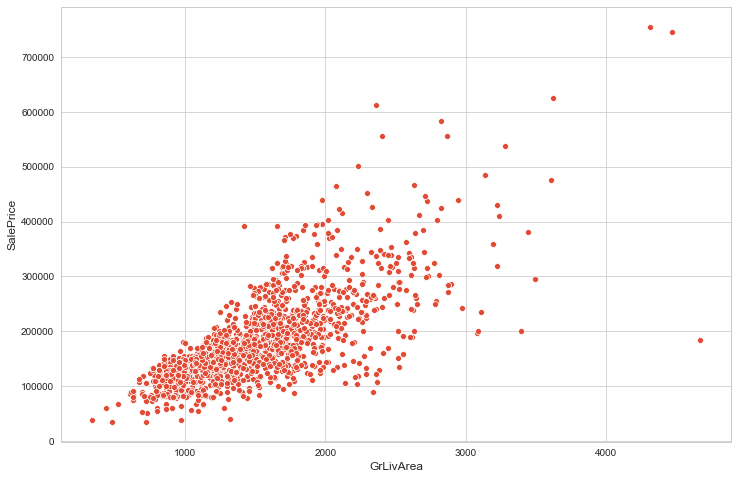

In [16]:
sns.scatterplot(df_train['GrLivArea'],df_train['SalePrice'])

In [17]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice'] < 300000)].index)

In [18]:
from scipy.stats import norm

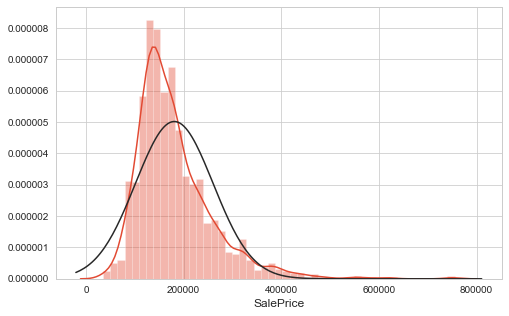

In [19]:
plt.figure(figsize=(8,5))
sns.distplot(df_train['SalePrice'], fit=norm)

In [20]:
df_train['SalePrice'].skew()

1.8812964895244009

In [21]:
df_train['SalePrice'].kurt()

6.523066888485879

In [22]:
from scipy import stats

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74213.25959976624, 180932.91906721535, 0.9320154492892367))

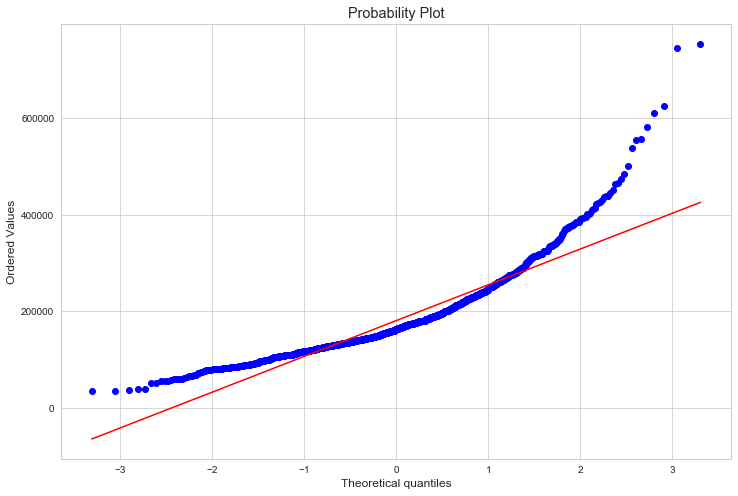

In [23]:
stats.probplot(df_train['SalePrice'],plot=plt)

In [24]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

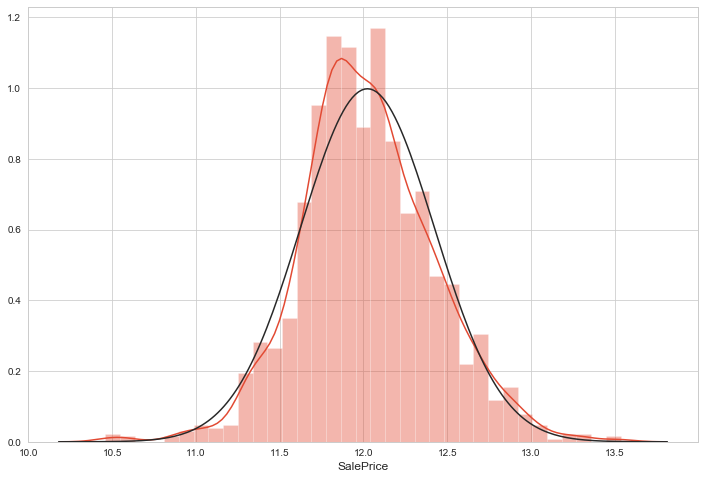

In [25]:
sns.distplot(df_train['SalePrice'], fit=norm)

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.3985320692976512, 12.024008660964794, 0.9953918648311367))

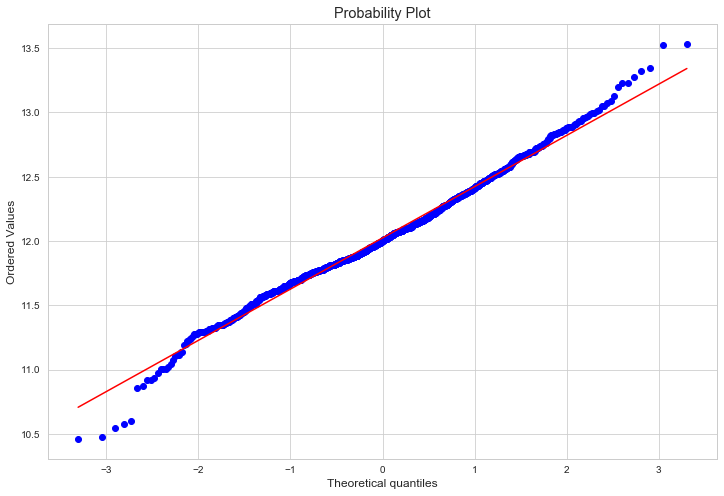

In [26]:
stats.probplot(df_train['SalePrice'],plot=plt)

In [27]:
df_all = concat_df(df_train,df_test)

In [28]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2917 non-null   int64  
 1   MSSubClass     2917 non-null   int64  
 2   MSZoning       2913 non-null   object 
 3   LotFrontage    2431 non-null   float64
 4   LotArea        2917 non-null   int64  
 5   Street         2917 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2917 non-null   object 
 8   LandContour    2917 non-null   object 
 9   Utilities      2915 non-null   object 
 10  LotConfig      2917 non-null   object 
 11  LandSlope      2917 non-null   object 
 12  Neighborhood   2917 non-null   object 
 13  Condition1     2917 non-null   object 
 14  Condition2     2917 non-null   object 
 15  BldgType       2917 non-null   object 
 16  HouseStyle     2917 non-null   object 
 17  OverallQual    2917 non-null   int64  
 18  OverallC

In [29]:
df_all = df_all.drop(['Id'],axis=1)

In [30]:
(df_all.isna().sum()/df_all.isna().count()).sort_values(ascending=False).head(35).index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'SalePrice', 'FireplaceQu',
       'LotFrontage', 'GarageCond', 'GarageYrBlt', 'GarageQual',
       'GarageFinish', 'GarageType', 'BsmtCond', 'BsmtExposure', 'BsmtQual',
       'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'MasVnrArea', 'MSZoning',
       'Utilities', 'Functional', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars',
       'BsmtFinSF2', 'Exterior2nd', 'GarageArea', 'TotalBsmtSF', 'BsmtUnfSF',
       'BsmtFinSF1', 'Exterior1st', 'KitchenQual', 'SaleType', 'Electrical'],
      dtype='object')

In [31]:
MF1 = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','MasVnrType']

for feature in MF1:
    df_all[feature] = df_all[feature].fillna('None') 

In [32]:
MF2 = ['TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','BsmtFullBath','BsmtHalfBath','MasVnrArea']
for feature in MF2:
    df_all[feature] = df_all[feature].fillna(0.)

In [33]:
df_all['BsmtExposure'] = df_all[['BsmtExposure','TotalBsmtSF']].apply(lambda x : 'No' if pd.isna(x[0]) == True and x[1] < 1000 else 'Gd' if pd.isna(x[0]) == True and x[1] > 1000 else 'No' if pd.isna(x[0]) == True and x[1] == 0. else x[0],axis=1)
df_all['BsmtCond'] = df_all[['BsmtCond','TotalBsmtSF']].apply(lambda x : 'TA' if pd.isna(x[0]) == True and x[1] < 1200 else 'Gd' if pd.isna(x[0]) == True and x[1] > 1200 else 'None' if pd.isna(x[0]) == True and x[1] == 0. else x[0],axis=1)
df_all['BsmtQual'] = df_all[['BsmtQual','TotalBsmtSF']].apply(lambda x : 'FA' if pd.isna(x[0]) == True and x[1] > 0 else 'None' if pd.isna(x[0]) == True and x[1] == 0. else x[0],axis=1)
df_all['BsmtFinType1'] = df_all[['BsmtFinType1','TotalBsmtSF']].apply(lambda x : 'None' if pd.isna(x[0]) == True and x[1]==0. else x[0],axis=1)
df_all['BsmtFinType2'] = df_all[['BsmtFinType2','TotalBsmtSF']].apply(lambda x : 'None' if pd.isna(x[0]) == True and x[1]==0. else 'GLQ' if pd.isna(x[0]) == True and x[1]==3206. else x[0],axis=1)

In [34]:
df_all['GarageType'][2576] = 'None'
df_all['GarageType'] = df_all['GarageType'].fillna('None')
df_all['GarageCars'] = df_all['GarageCars'].fillna(0.)
df_all['GarageArea'] = df_all['GarageArea'].fillna(0.)
df_all['GarageYrBlt'] = df_all[['GarageYrBlt','YearRemodAdd','GarageArea']].apply(lambda x : x[1] if pd.isna(x[0]) == True and x[2] > 0. else 'None' if pd.isna(x[0]) == True and x[2] == 0. else x[0],axis=1)
df_all['GarageFinish'] = df_all[['GarageFinish','GarageArea']].apply(lambda x : 'Unf' if pd.isna(x[0]) == True and x[1] > 0. else 'None' if pd.isna(x[0]) == True and x[1] == 0. else x[0],axis=1)
df_all['GarageQual'] = df_all[['GarageQual','GarageArea']].apply(lambda x : 'Fa' if pd.isna(x[0]) == True and x[1] > 0. else 'None' if pd.isna(x[0]) == True and x[1] == 0. else x[0],axis=1)
df_all['GarageCond'] = df_all[['GarageCond','GarageArea']].apply(lambda x : 'Fa' if pd.isna(x[0]) == True and x[1] > 0. else 'None' if pd.isna(x[0]) == True and x[1] == 0. else x[0],axis=1)

C:\Users\Rohit\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
(df_all.isna().sum()/df_all.isna().count()).sort_values(ascending=False).head(5)

SalePrice      0.500171
LotFrontage    0.166610
MSZoning       0.001371
Utilities      0.000686
Functional     0.000686
dtype: float64

In [36]:
df_all['MSZoning'] = df_all['MSZoning'].fillna('RL')

In [37]:
df_all['LotFrontage'] = df_all.groupby('Neighborhood')['LotFrontage'].transform(lambda x : x.fillna(x.median()))

In [38]:
df_all = df_all.drop('Utilities',axis=1)

In [39]:
df_all['Functional'] = df_all['Functional'].fillna('Typ')

In [40]:
MF3 = ['Exterior1st','Exterior2nd','SaleType','KitchenQual','Electrical','GarageYrBlt']
for feature in MF3:
    df_all[feature] = df_all[feature].fillna(df_all[feature].mode()[0])

In [41]:
df_all['TotalSF'] = df_all['GrLivArea'] + df_all['1stFlrSF'] + df_all['2ndFlrSF'] + df_all['TotalBsmtSF']

In [42]:
#df_all['TotalQualnCond'] = df_all['OverallQual'] + df_all['OverallCond']

In [43]:
#df_all['MSZoningc(all)']

In [44]:
# df_all['MSZoningc(all)'] = df_all['MSZoning'].apply(lambda x : 1 if x == 'C (all)' else  0)

In [45]:
from scipy.special import boxcox1p
from scipy.stats import skew

In [46]:
NF  = df_all.dtypes[df_all.dtypes != object].index
Skew = pd.DataFrame({'Skew':df_all[NF].apply(lambda x : skew(x)).sort_values(ascending=False)})
Skew = Skew[abs(Skew['Skew']) > 0.75]

In [47]:
for feature in Skew.index:
    df_all[feature] = boxcox1p(df_all[feature],0.15)

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
 N2CF = ['YearBuilt','YearRemodAdd','MoSold','YrSold','GarageYrBlt','MSSubClass']
 for feature in N2CF:
    df_all[feature] = df_all[feature].astype('str')
    df_all[feature] = LabelEncoder().fit_transform(list(df_all[feature].values))

In [50]:
# def fact(X):
#      for c in X.select_dtypes(object).columns:
#              X[c] = X[c].factorize()[0]

In [51]:
# fact(df_all)

In [52]:
df_all = pd.get_dummies(df_all)

In [53]:
print(df_all.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=301)


In [54]:
df_train , df_test = split_df(df_all)

In [55]:
df_train_X = df_train.drop('SalePrice',axis=1)
df_train_y = df_train['SalePrice']

In [56]:
df_train['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1453    12.072541
1454    12.254863
1455    12.493130
1456    11.864462
1457    11.901583
Name: SalePrice, Length: 1458, dtype: float64

In [57]:
from sklearn.linear_model import Lasso,ElasticNet,Ridge,LassoCV,ElasticNetCV,RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_score

In [58]:
# def rmse(model):
#     rmse = np.sqrt(-cross_val_score(model,df_train_X,df_train_y,scoring = 'neg_mean_squared_error',cv =5 ))
#     return rmse

In [59]:
# alphas = [12,13,14,15,16]
# {alpha:rmse(Ridge(alpha=alpha)).mean() for alpha in alphas}

In [60]:
# model = LassoCV(alphas = [1, 0.1, 0.001, 0.0005],verbose=0).fit(df_train_X, df_train_y)

In [61]:
# rmse(model).mean()

In [63]:
# fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(25,30))
# lcdf = pd.DataFrame(Models[0][0]['lasso'].coef_, index = df_train_X.columns,columns=['Lasso_Fimp']).sort_values(by='Lasso_Fimp')
# lcdf = pd.concat([lcdf.tail(10),lcdf.head(10)])
# sns.barplot(x=lcdf['Lasso_Fimp'],y=lcdf.index,ax=axes[0][0])
# sns.barplot(x=GB['GB_Fimp'],y=GB.index,ax=axes[0][1])
# sns.barplot(x=XGB["XGB_Fimp"],y=XGB.index,ax=axes[1][0])
# sns.barplot(x=LGB['LGBM_Fimp'],y=LGB.index,ax=axes[1][1])
# plt.tight_layout()
# sns.set('poster',font_scale=2)

In [64]:
Models = [
                {
                    0:make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1)),
                    1:make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)),
                    2:Ridge(alpha=13),
                    3:GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                                max_depth=4, max_features='sqrt',
                                                min_samples_leaf=15, min_samples_split=10, 
                                                loss='huber', random_state =5),
                    4:XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1),
                    5:LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11),
                },
                {
                    
                  0:make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1)),
                    
                   },
    ]

In [65]:
snkf = SNKFR(Models,3,[0])

In [66]:
snkf.fit(df_train_X,df_train_y)


 RMS Error of Layer-0 Model-0 = 0.11139928501473693
--------------------------------------------------


 RMS Error of Layer-0 Model-1 = 0.11143372032767654
--------------------------------------------------


 RMS Error of Layer-0 Model-2 = 0.1138166226753012
--------------------------------------------------


 RMS Error of Layer-0 Model-3 = 0.11813183692611598
--------------------------------------------------


 RMS Error of Layer-0 Model-4 = 0.11929708522217614
--------------------------------------------------


 RMS Error of Layer-0 Model-5 = 0.11859916501764747
--------------------------------------------------


 Layer 0 Ends Here: --0--0--0--0--0--0--0--0--0--- 


 RMS Error of Layer-1 Model-0 = 0.1096960415298111
--------------------------------------------------



In [67]:
endf = pd.DataFrame(Models[0][1]['elasticnet'].coef_,index = df_train_X.columns,columns=['Enet_Fimp']).sort_values(by='Enet_Fimp')
endf = pd.concat([endf.tail(10),endf.head(10)])

In [68]:
GB = pd.DataFrame(Models[0][3].feature_importances_,index = df_train_X.columns,columns=['GB_Fimp']).sort_values(by='GB_Fimp').tail(20)

In [69]:
XGB = pd.DataFrame(Models[0][4].feature_importances_,index = df_train_X.columns,columns=['XGB_Fimp']).sort_values(by='XGB_Fimp').tail(20)

In [70]:
LGB = pd.DataFrame(Models[0][5].feature_importances_,index = df_train_X.columns,columns=['LGBM_Fimp']).sort_values(by='LGBM_Fimp').tail(20)

In [71]:
# pickle.dump(snkf,open('Extra/HouseR-5-1-3_sub-1','wb'))
# #c= pickle.load(open('Extra/model-6-6-2-3_sub-1','rb'))

In [72]:
final_predictions = np.exp(snkf.predict(df_test))

In [73]:
final_predictions

,0
0,121291.919016
1,151047.514946
2,184260.231999
3,196919.568697
4,191911.583498
...,...
1454,87869.406994
1455,82576.218970
1456,178725.775498
1457,122571.628282


In [74]:
# MODEL_NAME = f'HouseR-6-6-3-1_sub-1{int(time.time())}'
# with open('Extra/model.log','a') as f:
#     f.write(f'{MODEL_NAME}\n')
#     for i in range(len(final_predictions[0])):    
#         f.write(f'{final_predictions[0][i]}\n')

In [75]:
final_predictions.columns = ['SalePrice']

In [76]:
final_predictions = pd.concat([test['Id'],final_predictions],axis=1)

In [77]:
final_predictions.to_csv('Data/submission.csv',index=False)